In [1]:
import pandas as pd
import numpy as np
import os, random, math
from matplotlib import pyplot
from openalea.vmango.simulation.fruitmodel.fruit_model_main import growth_main
from openalea.vmango.simulation.fruitmodel.fruitmodel import initialize_input
from openalea.vmango.simulation.fruitmodel.fruitmodel_error import FruitModelValueError

In [5]:
path_hourly = '../../share/environment/weather_hourly_stpierre_2002.csv'
path_daily = '../../share/environment/weather_daily_stpierre_2002.csv'
path_sunlit = '../../share/environment/sunlit_fractions.csv'
path_params = '../../share/parameters/fruitmodel/cogshall.toml'

In [6]:
df_hourly, df_daily, df_sunlit, params = initialize_input(path_hourly, path_daily, path_sunlit, path_params)

Input data has days with less than 24 h


In [7]:
bloom_date = '01/11/2002'
nb_fruits = 1
nb_leaves_treatments = [5, 10, 25, 50, 100, 150]

DM_fruit_0 = 0.97 * np.random.normal(13.9, 4.1) + 0.03 * np.random.normal(29.2, 0.66)
sunlit_bs = df_sunlit.iloc[:,random.randrange(0, 5)].to_numpy() 

In [8]:
dfs = []
for i, nb_leaves in enumerate(nb_leaves_treatments):
    df = None
    try:
        df = growth_main(bloom_date, nb_fruits, nb_leaves, DM_fruit_0, sunlit_bs, df_hourly, df_daily, params, verbose=False)
    except FruitModelValueError as e:
        print(i, nb_leaves, e)
    finally:
        dfs.append(df)
        if df is not None:
            display(df.head())


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,145.035828,18.801041,113.221964,0.119910,2.615529,-0.445112,0.422880,0.867992,12.341269,0.155856,3.432672,0.001569,0.016544,0.024352,359.1,5.0,0.419379,68
1,2002-11-09,154.134696,18.943410,122.286418,0.117967,2.572635,-0.482847,0.391605,0.874453,11.876682,0.158196,4.436418,0.001803,0.016913,0.024404,366.4,5.0,0.419379,69
2,2002-11-10,152.630879,19.091856,120.820425,0.116056,2.530444,-0.460672,0.420507,0.881179,12.554101,0.153574,3.754469,0.002071,0.017324,0.024446,374.5,5.0,0.419379,70
3,2002-11-11,154.270055,19.229377,122.175171,0.114176,2.488944,-0.440530,0.443820,0.884350,13.016606,0.133793,3.104415,0.002324,0.017710,0.024482,382.0,5.0,0.419379,71
4,2002-11-12,155.579700,19.318921,123.267948,0.112326,2.448126,-0.504734,0.382523,0.887257,11.896765,0.153871,4.877893,0.002587,0.018077,0.024457,389.4,5.0,0.419379,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,145.035828,18.801041,113.221964,0.239819,2.615529,-0.444222,0.423770,0.867992,12.295417,0.243412,3.432672,0.001569,0.016544,0.024352,359.1,10.0,0.419379,68
1,2002-11-09,154.337704,19.157387,122.328122,0.235934,2.572635,-0.484881,0.395844,0.880725,11.981508,0.252047,4.436418,0.001751,0.016996,0.024686,366.4,10.0,0.419379,69
2,2002-11-10,153.214427,19.535440,121.019100,0.232112,2.530444,-0.465912,0.428273,0.894185,12.824176,0.247495,3.754469,0.001969,0.017501,0.025027,374.5,10.0,0.419379,70
3,2002-11-11,155.246527,19.903045,122.539167,0.228352,2.488944,-0.449154,0.454861,0.904015,13.461062,0.206867,3.104415,0.002177,0.017987,0.025360,382.0,10.0,0.419379,71
4,2002-11-12,156.899007,20.172359,123.785478,0.224652,2.448126,-0.515656,0.396482,0.912139,12.459682,0.245279,4.877893,0.002413,0.018440,0.025561,389.4,10.0,0.419379,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,145.035828,18.801041,113.221964,0.599548,2.615529,-0.442481,0.425512,0.867992,12.205663,0.414800,3.432672,0.001569,0.016544,0.024352,359.1,25.0,0.419379,68
1,2002-11-09,154.735088,19.575420,122.409756,0.589835,2.572635,-0.488582,0.404319,0.892901,12.172224,0.458611,4.436418,0.001645,0.017151,0.025238,366.4,25.0,0.419379,69
2,2002-11-10,154.406166,20.456630,121.416381,0.580280,2.530444,-0.476169,0.444656,0.920826,13.352789,0.486841,3.754469,0.001735,0.017838,0.026237,374.5,25.0,0.419379,70
3,2002-11-11,157.367043,21.406353,123.307126,0.570879,2.488944,-0.467754,0.479195,0.946949,14.419662,0.388874,3.104415,0.001794,0.018525,0.027326,382.0,25.0,0.419379,71
4,2002-11-12,159.861170,22.119197,124.926085,0.561631,2.448126,-0.539642,0.427691,0.967333,13.695792,0.472037,4.877893,0.001927,0.019137,0.028094,389.4,25.0,0.419379,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,145.035828,18.801041,113.221964,1.199096,2.615529,-0.441599,0.426393,0.867992,12.160229,0.501559,3.432672,0.001569,0.016544,0.024352,359.1,50.0,0.419379,68
1,2002-11-09,154.936248,19.786629,122.451080,1.179671,2.572635,-0.490462,0.408552,0.899014,12.269115,0.560119,4.436418,0.001589,0.017226,0.025517,366.4,50.0,0.419379,69
2,2002-11-10,155.000593,20.914101,121.614780,1.160560,2.530444,-0.481082,0.452789,0.933871,13.605950,0.614895,3.754469,0.001609,0.017990,0.026839,374.5,50.0,0.419379,70
3,2002-11-11,158.436392,22.173278,123.688341,1.141759,2.488944,-0.476785,0.491563,0.968348,14.885055,0.503226,3.104415,0.001570,0.018757,0.028333,382.0,50.0,0.419379,71
4,2002-11-12,161.408486,23.162348,125.505830,1.123262,2.448126,-0.552005,0.444006,0.996011,14.332968,0.599600,4.877893,0.001615,0.019435,0.029459,389.4,50.0,0.419379,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,145.035828,18.801041,113.221964,2.398192,2.615529,-0.441321,0.426671,0.867992,12.145907,0.528907,3.432672,0.001569,0.016544,0.024352,359.1,100.0,0.419379,68
1,2002-11-09,154.999657,19.853152,122.464106,2.359341,2.576639,-0.490936,0.409997,0.900934,12.293556,0.603438,4.436418,0.001571,0.017249,0.025605,366.4,100.0,0.419379,69
2,2002-11-10,155.213976,21.085542,121.682539,2.321120,2.541402,-0.482690,0.456037,0.938728,13.688851,0.684268,3.754469,0.001559,0.018044,0.027065,374.5,100.0,0.419379,70
3,2002-11-11,158.885862,22.511944,123.840614,2.283518,2.499723,-0.480451,0.497238,0.977689,15.073985,0.580303,3.104415,0.001464,0.018850,0.028779,382.0,100.0,0.419379,71
4,2002-11-12,162.150450,23.686485,125.771837,2.246525,2.458728,-0.557993,0.452192,1.010185,14.641535,0.674769,4.877893,0.001445,0.019564,0.030146,389.4,100.0,0.419379,72


,DATE,FM_fruit,DM_fruit,W_fleshpeel,reserve_leaf,reserve_stem,water_potential,turgor_pressure,osmotic_pressure,flux_xyleme,flux_phloeme,transpiration,sucrose,soluble_sugars,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-08,145.035828,18.801041,113.221964,3.597288,2.615529,-0.441449,0.426544,0.867992,12.152477,0.516362,3.432672,0.001569,0.016544,0.024352,359.1,150.0,0.419379,68
1,2002-11-09,154.970571,19.822641,122.458131,3.539012,2.572635,-0.490538,0.409516,0.900054,12.273018,0.601395,4.436418,0.001579,0.017239,0.025564,366.4,150.0,0.419379,69
2,2002-11-10,155.157447,21.050109,121.659960,3.481680,2.530444,-0.482245,0.455481,0.937725,13.665884,0.681135,3.754469,0.001570,0.018033,0.027019,374.5,150.0,0.419379,70
3,2002-11-11,158.818987,22.469004,123.814515,3.425277,2.488944,-0.479787,0.496721,0.976508,15.039777,0.590282,3.104415,0.001478,0.018838,0.028722,382.0,150.0,0.419379,71
4,2002-11-12,162.102269,23.667583,125.747607,3.369787,2.448126,-0.557739,0.451937,1.009677,14.628481,0.675864,4.877893,0.001451,0.019560,0.030122,389.4,150.0,0.419379,72


### Lechaudel 2007, p. 226, fruit fresh matter vs days after bloom

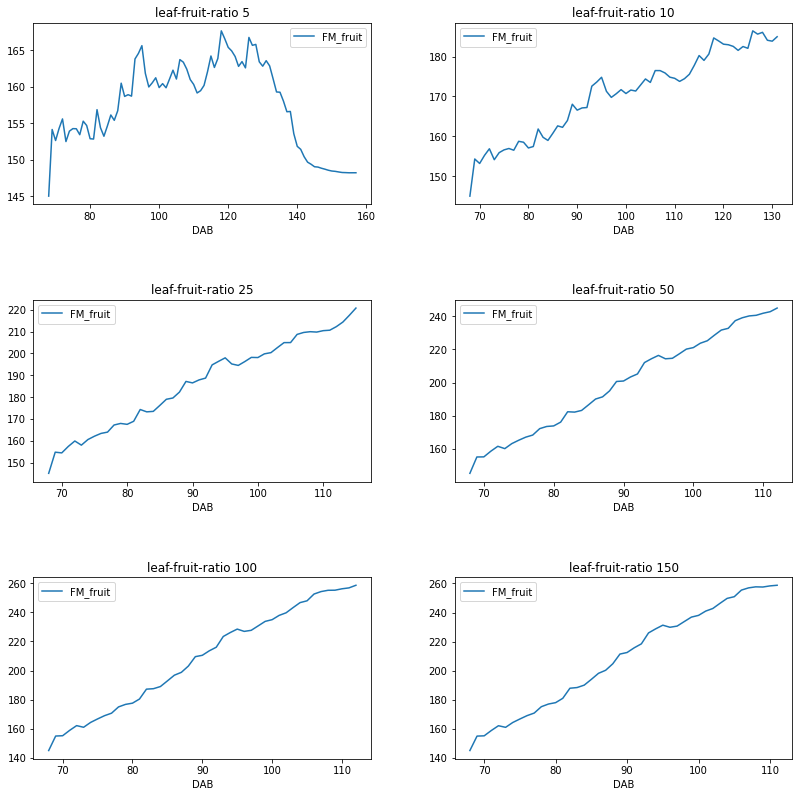

In [9]:
fig_1, axs_1 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_1 = axs_1.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'FM_fruit']].plot(
            x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_1[i], figsize=(12,12))

### Lechaudel 2005, p. 589, stem and leaf reserves vs days after bloom

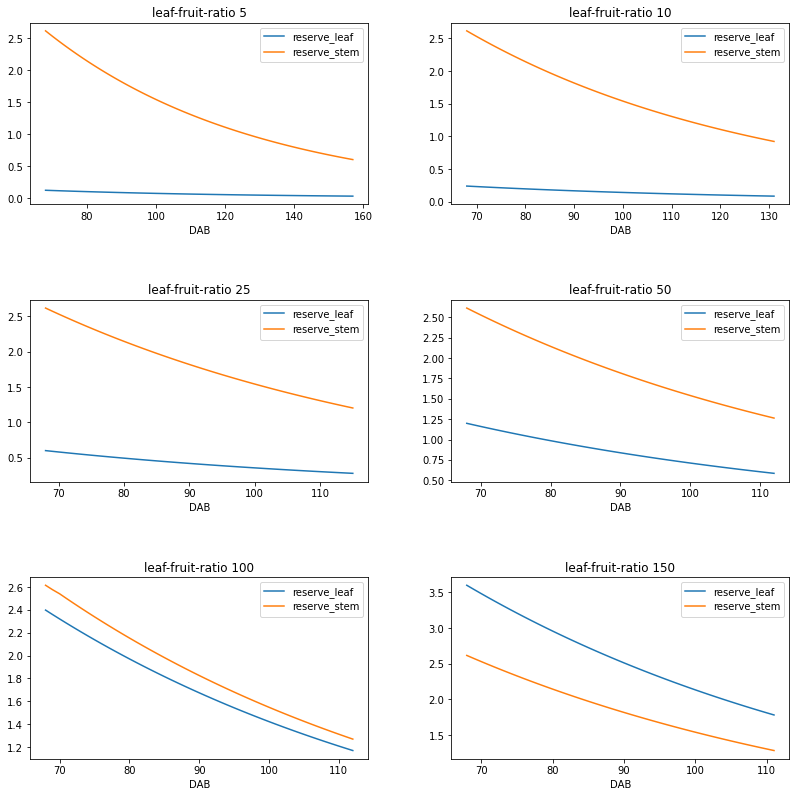

In [10]:
fig_2, axs_2 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_2 = axs_2.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'reserve_leaf', 'reserve_stem']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_2[i], figsize=(12,12))

### Lechaudel 2005, p. 590, fruit dry matter vs degree days

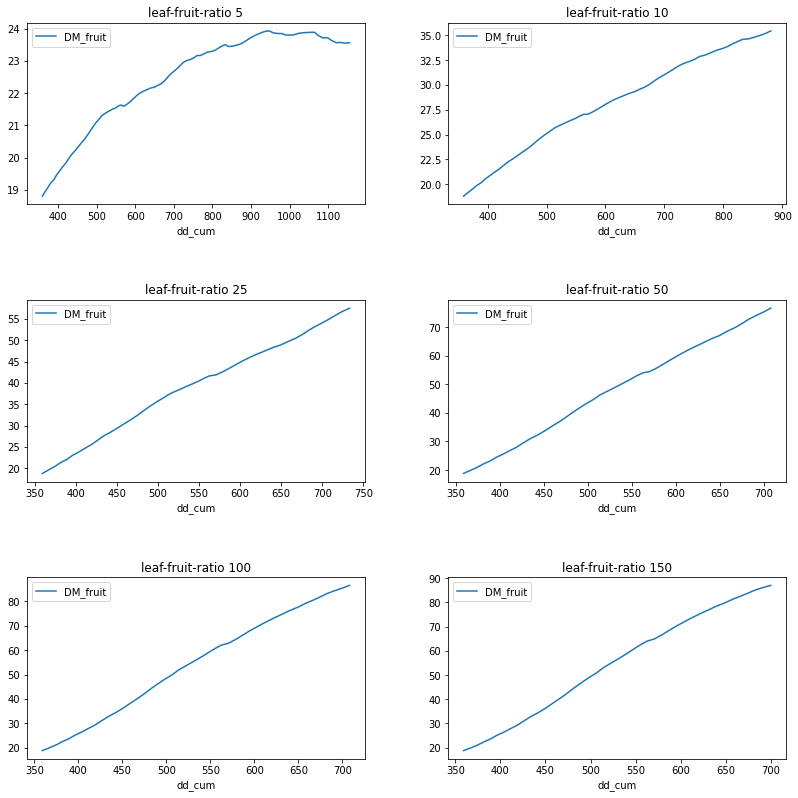

In [11]:
fig_3, axs_3 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_3 = axs_3.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['dd_cum', 'DM_fruit']].plot(
            x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_3[i], figsize=(12,12))